# Digit Recognizer Assignment Solve using SVM

## Data Understanding

Let's first understand the shape, attributes etc. of the dataset.

In [51]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
train = pd.read_csv("G:\\Data science\\PAII\\Assignment\\digit-recognizer\\train.csv")


In [52]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train.shape

(42000, 785)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [55]:
train.describe

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11    

In [56]:
print(train.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [57]:
sorted_label=list(np.sort(train['label'].unique()))
sorted_label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

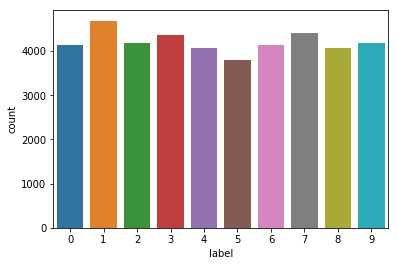

In [58]:
sns.countplot(train['label'])
plt.show()

we can clearly see that 1 have highest count among all

In [59]:
# check for missing values in train dataset
train.isnull().values.sum()

0

there is no missing value in train dataset

Text(0.5, 1.0, 'Digit 0')

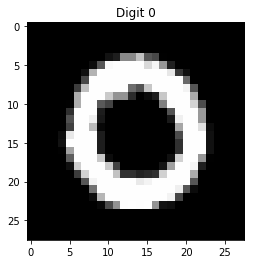

In [60]:
# Plotting some samples as well as converting into matrix

zero = train.iloc[1, 1:]
zero.shape
zero = zero.values.reshape(28,28)
plt.imshow(zero, cmap='gray')
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 4')

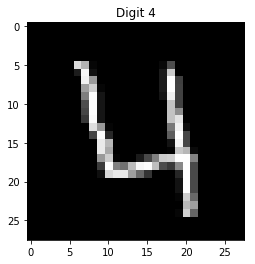

In [61]:
# Plotting some samples as well as converting into matrix

four = train.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

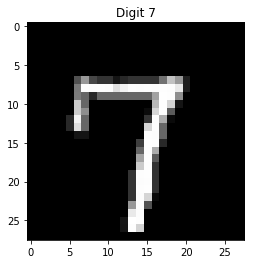

In [62]:
# Plotting some samples as well as converting into matrix

seven = train.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28,28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

Text(0.5, 1.0, 'Digit 8')

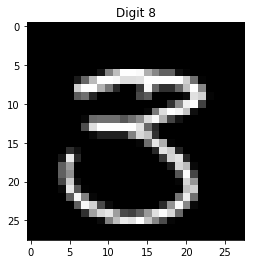

In [63]:
# Plotting some samples as well as converting into matrix

eight = train.iloc[7, 1:]
eight.shape
eight = eight.values.reshape(28,28)
plt.imshow(eight, cmap='gray')
plt.title("Digit 8")

Text(0.5, 1.0, 'Digit 9')

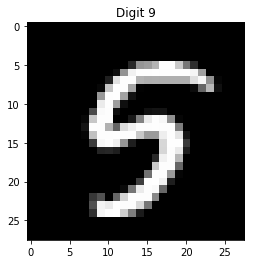

In [64]:
# Plotting some samples as well as converting into matrix

nine = train.iloc[8, 1:]
nine.shape
nine = nine.values.reshape(28,28)
plt.imshow(nine, cmap='gray')
plt.title("Digit 9")

In [65]:
digit_mean=train.groupby('label').mean()
digit_mean.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


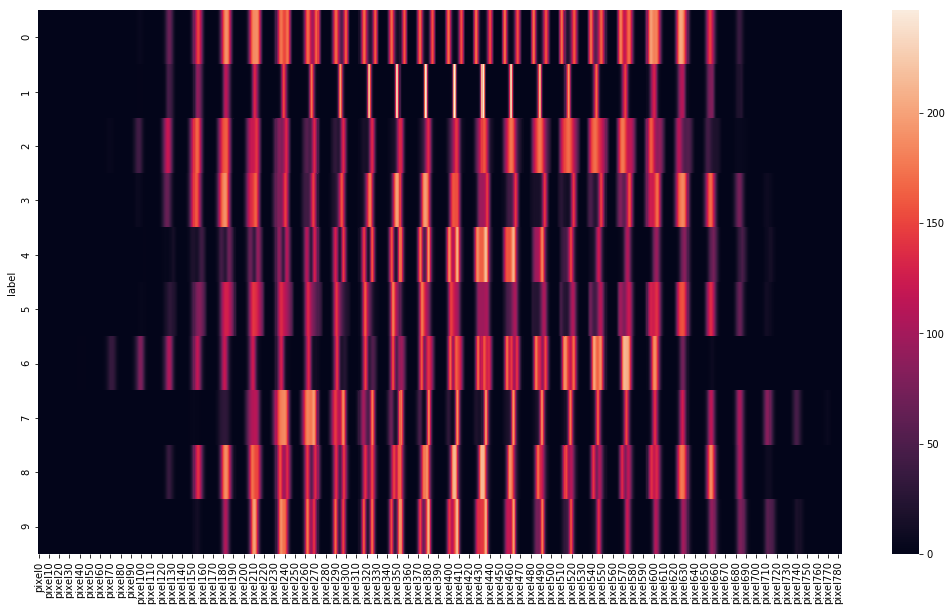

In [66]:
plt.figure(figsize=(18, 10))
sns.heatmap(digit_mean)

# Data Preparation

In [67]:
# average feature values
round(train.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [68]:
# splitting into X and y
X = train.drop("label", axis = 1)
y = train['label']

In [69]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.8, random_state = 101)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


# Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [70]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [71]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


The linear model gives approx. 91.31% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [72]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='poly')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.87125 

[[2893    0    8    3   38   13   28    0  299    3]
 [   1 3684   11    1   12    0    6    0   43    2]
 [  14   18 2489   37  153    1   11   19  588   13]
 [   0   16   24 2846   27   36    3   13  464   46]
 [   3    8   15    0 3080    8    3    5   17  151]
 [   6    1    5   72   73 2358   30    7  442   45]
 [  16    9   10    0  108   43 2901    2  188    0]
 [   1   41    7    7  138    1    0 2862  105  342]
 [   2   16    6   30   20   40    1    4 3131   22]
 [   6   14    1   13  153    8    0   42   88 3030]]


In [74]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [75]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


The non-linear model gives approx. 93.96% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

In [ ]:
We got 93.96% Accuracy from rbf kernel which is hieghest of all, so we use this kernel for Hyperparameter tuning

# Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [76]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 77.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [77]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,86.001775,0.633781,11.500670,1.741767,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,12,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,21.911161,0.763592,6.366285,0.185723,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,4,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,30.693974,0.216498,8.292901,0.092355,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,8,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,89.134391,0.281117,10.625280,0.129692,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,18.217772,0.242447,5.482288,0.096702,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,14.102900,0.087408,5.193309,0.045522,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,5,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,88.867327,0.274576,10.639025,0.071334,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,18.246329,0.254104,5.553145,0.071304,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,10.624172,0.123201,4.294867,0.042011,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,6,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645
9,88.955955,0.271542,10.608855,0.139072,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


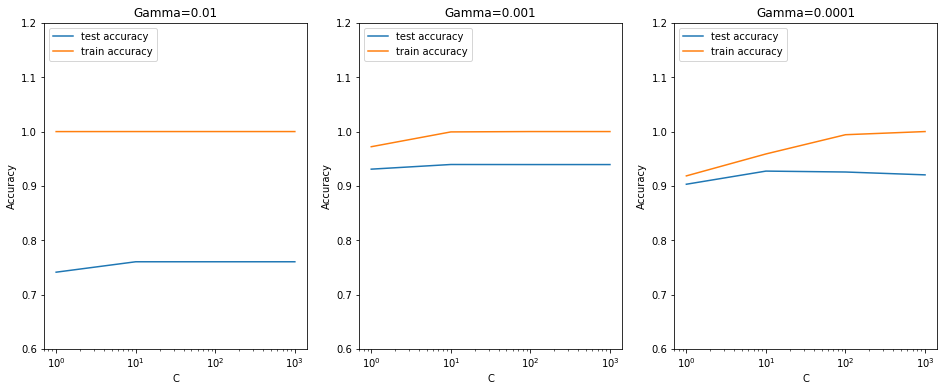

In [78]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.20])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.20])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.20])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [79]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


# Building and Evaluating the Final Model

In [80]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



In [81]:
# importing test dataset
test=pd.read_csv("G:\\Data science\\PAII\\Assignment\\digit-recognizer\\test.csv")

In [82]:
test.shape

(28000, 784)

In [83]:
X_test=test[test.columns]

In [84]:
X_test_scaled=scale(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [85]:
model=model.predict(X_test_scaled)

In [86]:
test_data=pd.DataFrame(model,columns=['label'],index=np.arange(1,28001))

In [88]:
# Saving the dataframe into final_result.csv file
test_data.to_csv('d://final_result.csv',index='ImageId')